In [12]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dense,Dropout
from tqdm import tqdm
import os
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image

## Creating Dataframe 

In [2]:
#Loading name of images from the folder
l=os.listdir(r"E:\shubham\Lord Project ML\Data")

In [3]:
    
base='E:\shubham\Lord Project ML\Data'

path=[]
age=[]
gender=[]
# temp=l[0].split('_')
# print(temp)
for i in l:
#Combining folder path & image name to get actual path of each image
    filepath=os.path.join(base,i) # here we took folder path + imagepath hence indirectly we gave image path in filepath
    path.append(filepath) # and here we are saving our image paths in path list
    
# Spliting the name of the image and extracting Age and gender from it.   
    temp=i.split('_')
    age.append(temp[0])
    gender.append(temp[1])  

# image name format :  100_0_23541369.jpg

In [4]:
df=pd.DataFrame({'Path':path, 'Age':age, 'Gender':gender})
df.sample(5)

,Path,Age,Gender
8588,E:\shubham\Lord Project ML\Data\28_0_0_2017011...,28,0
10983,E:\shubham\Lord Project ML\Data\30_1_0_2017011...,30,1
14614,E:\shubham\Lord Project ML\Data\38_0_4_2017010...,38,0
4624,E:\shubham\Lord Project ML\Data\24_1_1_2017011...,24,1
17520,E:\shubham\Lord Project ML\Data\49_1_0_2017010...,49,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    23708 non-null  object
 1   Age     23708 non-null  object
 2   Gender  23708 non-null  object
dtypes: object(3)
memory usage: 555.8+ KB


In [6]:
# Changing Datatype of columns
df['Age']=df['Age'].astype(int)
df['Gender']=df['Gender'].astype(int)
df=df[df['Age']<60]
df=df[df['Age']>5]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18655 entries, 19 to 23707
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    18655 non-null  object
 1   Age     18655 non-null  int32 
 2   Gender  18655 non-null  int32 
dtypes: int32(2), object(1)
memory usage: 437.2+ KB


## EDA 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

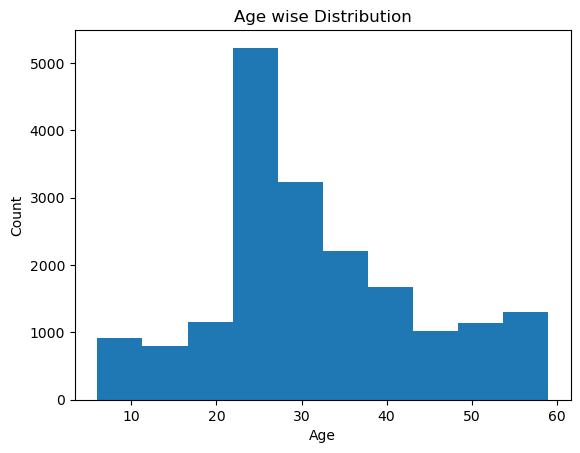

In [9]:
plt.hist(df['Age'],bins=10)
plt.title("Age wise Distribution")
plt.xlabel("Age")
plt.ylabel("Count");

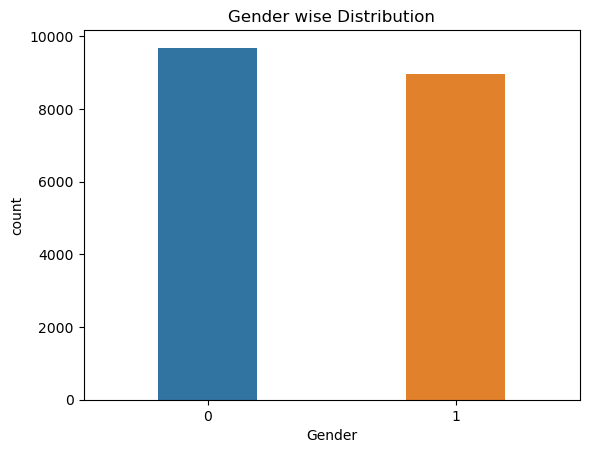

In [10]:
sns.countplot(data=df,x='Gender', width=0.4)
plt.title("Gender wise Distribution");

## Feature Extraction 

In [13]:
def extract(path):
    feature=[]
    for i in tqdm(path):                                # grayscale > makes it 1d 
        pic=load_img(i,grayscale=True) # Loading image  # grayscale> bcuz if u load it as rgb means it will load  in 3 dimensions > too much memory 
        pic=pic.resize((128,128),Image.ANTIALIAS) # Reshaping image to compress image initially it was 200 * 200> ANTIALIAS: We may get some distortions hence to avoid that we use ANTIALIAS
        pic=np.array(pic) # Converting into array of pixles > everything to deal with array only 
        feature.append(pic) # Appending arrays to common list
    feature=np.array(feature) #Converting feature list to numpy array > Because neural networks can handle numpy array only 
    feature=feature.reshape(len(feature),128,128,1) # >neural network will take perticular input feature (numberof samples, width,height, RGB or Grayscale)
    return feature                                  # default is 3 rgb but we took grayscale true hence make it 1
image=extract(df['Path'])

  0%|                                                                                        | 0/18655 [00:00<?, ?it/s]C:\Users\admin\AppData\Local\Temp\ipykernel_11684\559765546.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pic=pic.resize((128,128),Image.ANTIALIAS) # Reshaping image to compress image
100%|███████████████████████████████████████████████████████████████████████████| 18655/18655 [00:47<00:00, 391.35it/s]


In [14]:
image.shape #(number of images, height, width, number of plane)

(18655, 128, 128, 1)

In [15]:
norm_image=image/255  # as pixel value is in 0-255 so normalizing to get the values in between 0 to 1
age=np.array(df['Age'])  # convert age to numpy array
gender=np.array(df['Gender'])  # convert gender to numpy array

print(len(image))
print(len(age))
print(len(gender))

18655
18655
18655


In [16]:
age #maximum age = 116

array([10, 10, 10, ...,  9,  9,  9])

In [20]:
# MODEL CREATION > CNN 

model=Sequential() #here we are creating object of sequential model

model.add(Conv2D(32,(3,3),input_shape=(128,128,1),activation='relu'))  
model.add(MaxPooling2D(2,2))  # To decrease the computational power required to process data
model.add(Conv2D(64,(3,3),activation='relu')) # 64 filters , kernel size (3,3), relu activations improves performance 
model.add(MaxPooling2D(2,2)) #we are increasing no. of filters to extract more features from the images
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())  # to transform the output of the previous layer(s) into a one-dimensional array or vector.>> 
                      # fully connected layers can then learn to make predictions or classifications based on the 
                      # flattened feature vector. Hence we flatten flatten matrix into single dimension vectors 

    
# These are FULLY CONNECTED LAYERS : 

model.add(Dense(256,activation='relu'))  # 256 is no of neurons in layer
model.add(Dense(1,activation='sigmoid',name='Gender'))  #  ,our classification is binary hence Sigmoid
model.add(Dropout(0.3))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy') 

# 32*(3*3)+32 (no of filters *(kernal size) + bias for each filters )

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)     

In [22]:
# TRAIN THE MODEL

history=model.fit(norm_image,gender,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
467/467 [==============================] - 165s 352ms/step - loss: 2.6954 - accuracy: 0.6989 - val_loss: 0.4114 - val_accuracy: 0.8244
Epoch 2/10
467/467 [==============================] - 159s 341ms/step - loss: 2.7255 - accuracy: 0.7031 - val_loss: 0.5792 - val_accuracy: 0.6674
Epoch 3/10
467/467 [==============================] - 160s 343ms/step - loss: 2.6886 - accuracy: 0.7272 - val_loss: 0.6095 - val_accuracy: 0.6709
Epoch 4/10
467/467 [==============================] - 174s 372ms/step - loss: 2.6407 - accuracy: 0.7383 - val_loss: 0.4047 - val_accuracy: 0.8135
Epoch 5/10
467/467 [==============================] - 158s 339ms/step - loss: 2.6218 - accuracy: 0.7488 - val_loss: 0.5141 - val_accuracy: 0.7239
Epoch 6/10
467/467 [==============================] - 159s 340ms/step - loss: 2.6033 - accuracy: 0.7554 - val_loss: 0.5597 - val_accuracy: 0.6910
Epoch 7/10
467/467 [==============================] - 160s 342ms/step - loss: 2.5752 - accuracy: 0.7716 - val_loss: 0.3833 -

Original age: 0
1/1 [==============================] - 0s 279ms/step
0.013063583


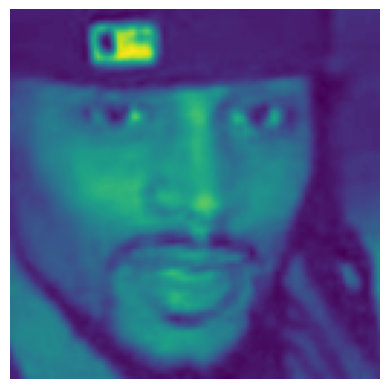

In [23]:
# TESTING DATA

image_index=5000
print('Original age:',gender[image_index])
ip=image[image_index].reshape(1,128,128,1)
ip=ip/255
pred=model.predict(ip)
print(pred[0][0])
plt.imshow(image[image_index])
plt.axis('off');


In [24]:
def pred(path):
    label={0:'Male',1:'Female'}
    pic=load_img(path,grayscale=True)
    pic=pic.resize((128,128),Image.ANTIALIAS)
    pic=np.array(pic)
    pred=model.predict(pic.reshape(1,128,128,1))
    plt.imshow(pic,cmap='gray')
    plt.axis('off');
    return pred[0][0]
    

1/1 [==============================] - 0s 69ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_11684\2094824729.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pic=pic.resize((128,128),Image.ANTIALIAS)


0.0

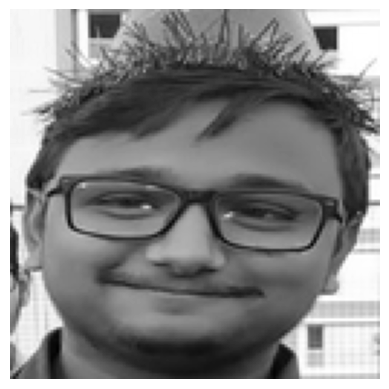

In [25]:
pred(r"C:\Users\admin\Downloads\WhatsApp Image 2023-06-08 at 4.39.43 PM.jpeg")

1/1 [==============================] - 0s 16ms/step


C:\Users\admin\AppData\Local\Temp\ipykernel_11684\2094824729.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pic=pic.resize((128,128),Image.ANTIALIAS)


0.0018882684

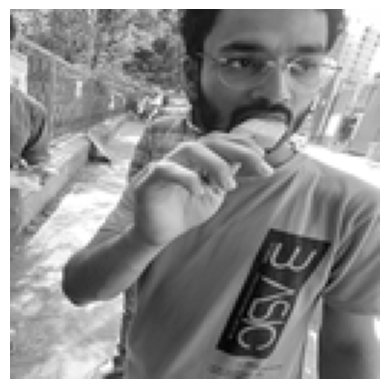

In [26]:
pred(r"C:\Users\admin\Downloads\WhatsApp Image 2023-06-08 at 4.39.34 PM.jpeg")

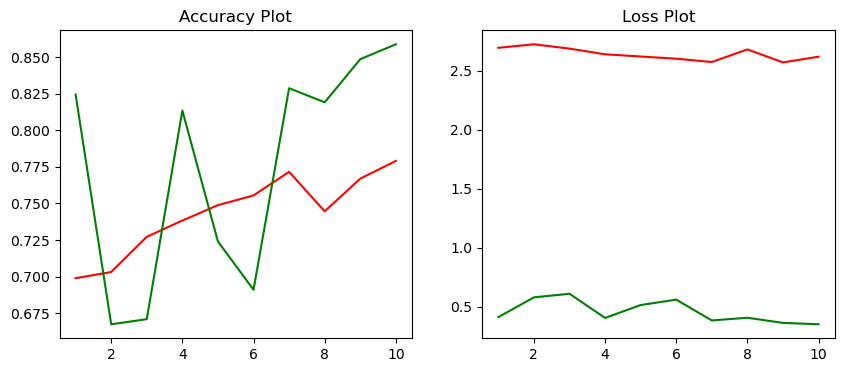

In [29]:
plt.figure(figsize=(10,4))
acc=history.history['accuracy']          # TRAINING ACCURACY
val_acc=history.history['val_accuracy']  # TESTING / VALIDATION ACCURACY

loss=history.history['loss']
val_loss=history.history['val_loss']

ep=range(1,len(acc)+1)                   # epochs given here > based on number of samples

plt.subplot(1,2,1)
plt.plot(ep,acc,label='Training',c='r')          # Training accuracy 
plt.plot(ep,val_acc,label='Validation',c='g')     # Validation Accuracy in checking Accuracy plot
plt.title("Accuracy Plot")

plt.subplot(1,2,2)
plt.plot(ep,loss,label='Training',c='r')     # Training loss
plt.plot(ep,val_loss,label='Validation',c='g') # Validation loss in checking Accuracy plot 
plt.title("Loss Plot");

In [30]:
history.history['accuracy']

[0.698874294757843,
 0.7030956745147705,
 0.7271509170532227,
 0.7382739186286926,
 0.74879390001297,
 0.7554274797439575,
 0.7715759873390198,
 0.7445725202560425,
 0.7668855786323547,
 0.7790136933326721]

In [31]:
history.history['val_accuracy']

[0.8244438767433167,
 0.6673814058303833,
 0.6708657145500183,
 0.8134548664093018,
 0.7239345908164978,
 0.6909675598144531,
 0.8287322521209717,
 0.8190833330154419,
 0.8485660552978516,
 0.8587509989738464]

In [34]:
import pickle

with open("E:\\shubham\\Lord Project ML\\10_epoch_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [35]:
with open("E:\\shubham\\Lord Project ML\\10_epoch_model_history.pkl", "wb") as file:
    pickle.dump(history, file)